In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [86]:
pip install plotnine

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
record_csv = '/content/drive/My Drive/DS340W/log_records.csv'
record_df = pd.read_csv(record_csv)

In [89]:
record_df

,id,dataset,all_f1_score_1st,all_f1_score_2nd,row_f1_score,column_f1_score,reduce_f1_score,row_num,feature_num,class_num,...,time_all_1st,time_all_2nd,time_row,time_column,time_reduced,Validation_loss_1,Validation_loss_2,Validation_loss_3,Validation_loss_4,Validation_loss_5
0,1,madelon,0.810,0.863,0.771,0.800,0.810,2600,500,2,...,48.531,54.662,57.172,35.957,48.694,0.102,0.132,0.170,0.173,0.170
1,2,ba,1.000,1.000,0.990,0.870,0.810,1372,4,2,...,59.710,48.524,60.094,41.713,24.712,0.002,0.001,0.000,0.101,0.092
2,3,scene,0.980,0.980,0.980,0.860,0.850,2407,294,2,...,19.469,20.649,45.895,52.817,20.130,0.028,0.028,0.038,0.194,0.255
3,4,iris,1.000,1.000,1.000,0.972,0.944,150,4,3,...,60.046,60.009,60.009,20.278,60.061,0.000,0.041,0.035,0.035,0.000
4,5,credit-g,0.750,0.750,0.710,0.710,0.710,1000,20,2,...,51.548,59.933,48.650,27.310,23.233,0.302,0.309,0.310,0.310,0.310
5,6,abalone,0.560,0.560,0.536,0.546,0.515,4177,8,3,...,15.280,11.756,29.480,42.650,57.662,0.437,0.437,0.443,0.454,0.448
6,7,btsc,0.729,0.720,0.724,0.621,0.722,748,4,2,...,50.187,25.375,48.020,12.591,48.654,0.306,0.314,0.350,0.361,0.374
7,8,wdbc,0.971,0.971,0.957,0.971,0.971,569,30,2,...,19.311,28.551,38.341,53.443,19.735,0.030,0.030,0.027,0.056,0.041
8,9,pc4,0.835,0.835,0.834,0.768,0.828,1458,37,2,...,43.556,49.194,48.401,52.609,44.548,0.232,0.232,0.216,0.284,0.302


In [90]:
record_df = record_df.drop('id', axis = 1)


In [91]:
record_df.dtypes

dataset               object
all_f1_score_1st     float64
all_f1_score_2nd     float64
row_f1_score         float64
column_f1_score      float64
reduce_f1_score      float64
row_num                int64
feature_num            int64
class_num              int64
model consistency     object
time_all_1st         float64
time_all_2nd         float64
time_row             float64
time_column          float64
time_reduced         float64
Validation_loss_1    float64
Validation_loss_2    float64
Validation_loss_3    float64
Validation_loss_4    float64
Validation_loss_5    float64
dtype: object

# Dataset Analysis

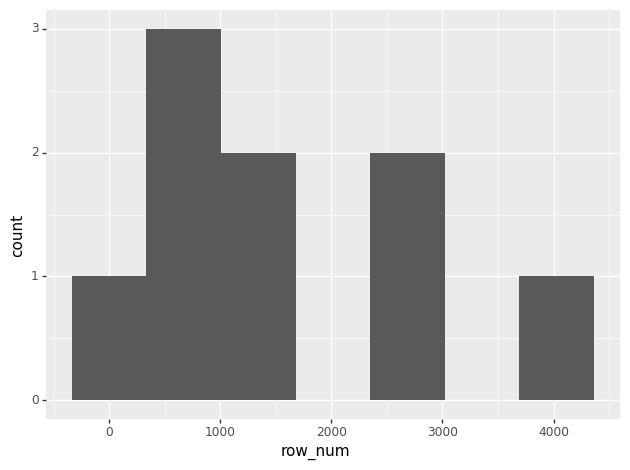

<ggplot: (8783492718021)>

In [92]:
from plotnine import ggplot, aes, stat_bin, geom_bar

ggplot(record_df) + aes(x="row_num") + stat_bin(bins=7) + geom_bar()

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


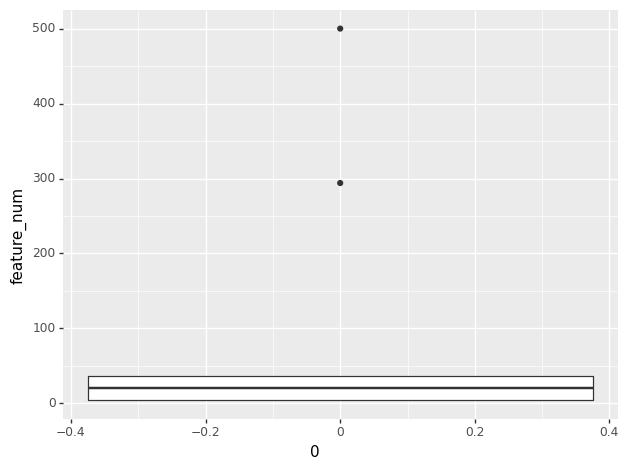

<ggplot: (8783492725993)>

In [93]:
from plotnine import ggplot, aes, stat_bin, geom_boxplot, theme

ggplot(record_df) + aes(x= 0 ,y = "feature_num") + geom_boxplot()

{'boxes': [<matplotlib.lines.Line2D at 0x7fd10f5eb790>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd10f4e8f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd10f4f9290>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd10f4f9610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd10f4e87d0>,
  <matplotlib.lines.Line2D at 0x7fd10f4e8f50>]}

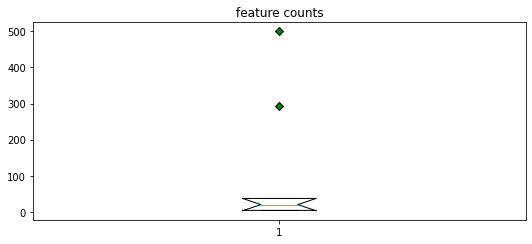

In [94]:

green_diamond = dict(markerfacecolor='g', marker='D')
fig2, ax2 = plt.subplots()
ax2.set_title('feature counts')
ax2.boxplot(record_df.feature_num, notch=True, flierprops=green_diamond)

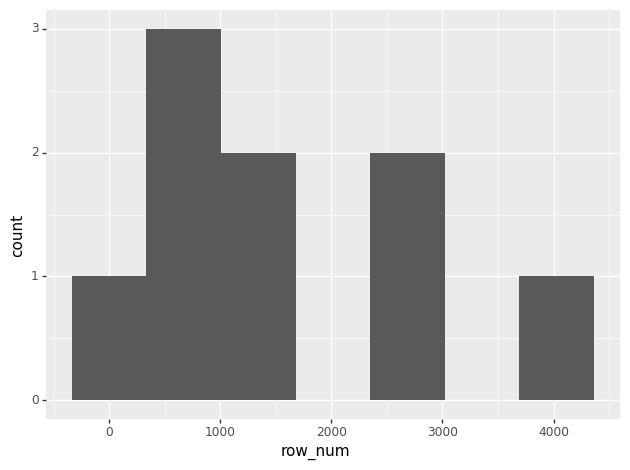

<ggplot: (8783492780161)>

In [95]:
from plotnine import ggplot, aes, stat_bin, geom_bar

ggplot(record_df) + aes(x="row_num") + stat_bin(bins=7) + geom_bar()

# Comparisons

In [96]:
diff_column = record_df.all_f1_score_2nd - record_df.column_f1_score
diff_row = record_df.all_f1_score_1st - record_df.row_f1_score
diff_all = record_df.all_f1_score_1st - record_df.all_f1_score_2nd
diff_reduce = record_df.all_f1_score_1st - record_df.reduce_f1_score

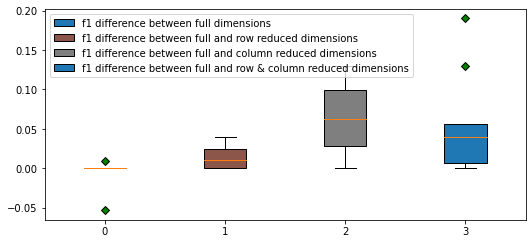

In [97]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = fig.add_subplot(111)

bp1 = ax.boxplot(diff_all, positions = [0], widths=0.35, patch_artist=True, boxprops=dict(facecolor="C0"),flierprops=green_diamond)
bp2 = ax.boxplot(diff_row, positions = [1], widths=0.35, patch_artist=True, boxprops=dict(facecolor="C5"))
bp3 = ax.boxplot(diff_column, positions = [2], widths=0.35, patch_artist=True, boxprops=dict(facecolor="C7"))
bp4 = ax.boxplot(diff_reduce, positions = [3], widths=0.35, patch_artist=True, boxprops=dict(facecolor="C10"), flierprops=green_diamond)

ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0], bp4["boxes"][0]], 
          ["f1 difference between full dimensions", "f1 difference between full and row reduced dimensions","f1 difference between full and column reduced dimensions", 
           "f1 difference between full and row & column reduced dimensions" ], loc='upper left')

plt.show()